# 영업 성공 여부 분류 경진대회

## 1. 데이터 확인

### 필수 라이브러리

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore') # 경고 메세지 무시

### 데이터 셋 읽어오기

In [2]:
df_train = pd.read_csv("../data/train.csv") # 학습용 데이터
df_test = pd.read_csv("../data/submission.csv") # 테스트 데이터(제출파일의 데이터)

In [3]:
df_train.tail() # 학습용 데이터 살펴보기

,bant_submit,customer_country,business_unit,com_reg_ver_win_rate,customer_idx,customer_type,enterprise,historical_existing_cnt,id_strategic_ver,it_strategic_ver,...,response_corporate,expected_timeline,ver_cus,ver_pro,ver_win_rate_x,ver_win_ratio_per_bu,business_area,business_subarea,lead_owner,is_converted
59294,1.00,/Sląskie/Poland,AS,NaN,33747,End Customer,SMB,NaN,NaN,NaN,...,LGEPL,3 months ~ 6 months,0,0,0.000026,0.028777,public facility,Others,694,False
59295,0.75,/Bogotá DC /Colombia,AS,0.04,35420,Specifier/ Influencer,Enterprise,NaN,NaN,NaN,...,LGECB,9 months ~ 1 year,0,0,0.000026,0.028777,public facility,NaN,39,False
59296,0.75,/Pisco/Peru,AS,0.04,19249,Specifier/ Influencer,Enterprise,NaN,NaN,NaN,...,LGEPR,less than 3 months,0,0,0.000026,0.028777,public facility,NaN,125,False
59297,1.00,/santa cruz bolivia/Peru,AS,0.04,40327,NaN,Enterprise,NaN,NaN,NaN,...,LGEPR,more than a year,0,0,0.000026,0.028777,public facility,NaN,134,False
59298,0.75,/paris/France,Solution,NaN,30268,NaN,Enterprise,NaN,NaN,NaN,...,LGEKR,less than 3 months,0,0,0.000026,NaN,public facility,NaN,441,False


타겟변수(is_converted)를 포함하여 29개의 칼럼으로 이루어져 있고  
59298개의 데이터를 가짐을 확인할수 있다.

In [4]:
df_test.tail() # 테스트 데이터 살펴보기

,id,bant_submit,customer_country,business_unit,com_reg_ver_win_rate,customer_idx,customer_type,enterprise,historical_existing_cnt,id_strategic_ver,...,response_corporate,expected_timeline,ver_cus,ver_pro,ver_win_rate_x,ver_win_ratio_per_bu,business_area,business_subarea,lead_owner,is_converted
5266,13855,0.50,/São Paulo/Brazil,AS,NaN,40292,NaN,Enterprise,10.0,NaN,...,LGESP,NaN,0,0,NaN,NaN,NaN,NaN,97,False
5267,7979,0.25,General / / United States,IT,NaN,47466,NaN,Enterprise,0.0,NaN,...,LGEUS,NaN,0,0,NaN,NaN,NaN,NaN,438,False
5268,12887,0.75,/ OURO BRANCO / Brazil,AS,NaN,46227,Specifier/ Influencer,Enterprise,NaN,NaN,...,LGESP,less than 3 months,0,0,NaN,NaN,NaN,NaN,97,True
5269,17530,0.00,/ / Germany,IT,NaN,45667,End Customer,SMB,NaN,NaN,...,LGEDG,NaN,0,0,NaN,NaN,NaN,NaN,429,False
5270,4330,0.25,/ Ongole / India,AS,NaN,23646,End Customer,Enterprise,NaN,NaN,...,LGEIL,NaN,0,0,NaN,NaN,NaN,NaN,4,True


테스트 데이터의 경우 id 칼럼이 추가되는것을 확인할수 있다.

훈련용 데이터에 대해서 가지고 있는 정보를 확인하면 다음과 같다.

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59299 entries, 0 to 59298
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   bant_submit              59299 non-null  float64
 1   customer_country         58317 non-null  object 
 2   business_unit            59299 non-null  object 
 3   com_reg_ver_win_rate     14568 non-null  float64
 4   customer_idx             59299 non-null  int64  
 5   customer_type            15338 non-null  object 
 6   enterprise               59299 non-null  object 
 7   historical_existing_cnt  13756 non-null  float64
 8   id_strategic_ver         3444 non-null   float64
 9   it_strategic_ver         1121 non-null   float64
 10  idit_strategic_ver       4565 non-null   float64
 11  customer_job             40566 non-null  object 
 12  lead_desc_length         59299 non-null  int64  
 13  inquiry_type             58358 non-null  object 
 14  product_category      

### 결측치 확인

In [6]:
df_train.isnull().sum() / df_train.shape[0]

bant_submit                0.000000
customer_country           0.016560
business_unit              0.000000
com_reg_ver_win_rate       0.754330
customer_idx               0.000000
customer_type              0.741345
enterprise                 0.000000
historical_existing_cnt    0.768023
id_strategic_ver           0.941921
it_strategic_ver           0.981096
idit_strategic_ver         0.923017
customer_job               0.315908
lead_desc_length           0.000000
inquiry_type               0.015869
product_category           0.326717
product_subcategory        0.844264
product_modelname          0.844365
customer_country.1         0.016560
customer_position          0.000000
response_corporate         0.000000
expected_timeline          0.520464
ver_cus                    0.000000
ver_pro                    0.000000
ver_win_rate_x             0.689421
ver_win_ratio_per_bu       0.741918
business_area              0.689421
business_subarea           0.906811
lead_owner                 0

결측치를 포함하고 있는 변수들이 있음을 확인할수 있다.

### 이상치 확인

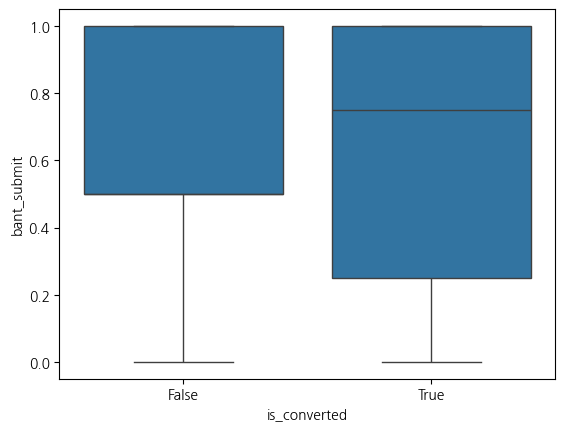

In [7]:
sns.boxplot(x='is_converted', y='bant_submit', data=df_train, order=sorted(df_train['is_converted'].unique()))
plt.show()

## 2. 데이터 전처리

### 레이블 인코딩

In [8]:
def label_encoding(series: pd.Series) -> pd.Series:
    """범주형 데이터를 시리즈 형태로 받아 숫자형 데이터로 변환합니다."""

    my_dict = {}

    # 모든 요소를 문자열로 변환
    series = series.astype(str)

    for idx, value in enumerate(sorted(series.unique())):
        my_dict[value] = idx
    series = series.map(my_dict)

    return series

In [9]:
# 레이블 인코딩할 칼럼들
label_columns = [
    "customer_country",
    "business_subarea",
    "business_area",
    "business_unit",
    "customer_type",
    "enterprise",
    "customer_job",
    "inquiry_type",
    "product_category",
    "product_subcategory",
    "product_modelname",
    "customer_country.1",
    "customer_position",
    "response_corporate",
    "expected_timeline",
]

df_all = pd.concat([df_train[label_columns], df_test[label_columns]])

for col in label_columns:
    df_all[col] = label_encoding(df_all[col])

다시 학습 데이터와 제출 데이터를 분리합니다.

In [10]:
for col in label_columns:  
    df_train[col] = df_all.iloc[: len(df_train)][col]
    df_test[col] = df_all.iloc[len(df_train) :][col]

### 2-2. 학습, 검증 데이터 분리

In [11]:
x_train, x_val, y_train, y_val = train_test_split(
    df_train.drop("is_converted", axis=1),
    df_train["is_converted"],
    test_size=0.2,
    shuffle=True,
    random_state=400,
)

## 3. 모델 학습

### 모델 정의 

In [12]:
from lightgbm import LGBMClassifier

# LightGBM 
lgb_model = LGBMClassifier(
    num_leaves=70,
    max_depth=20,
    n_estimators=750,
    learning_rate=0.01,
    min_child_samples=20,
    verbose = -1
)

### 모델 학습

In [13]:
lgb_model.fit(x_train.fillna(0), y_train)

LGBMClassifier(learning_rate=0.01, max_depth=20, n_estimators=750,
               num_leaves=70, verbose=-1)

### 모델 성능 보기

In [14]:
def get_clf_eval(y_test, y_pred=None):
    confusion = confusion_matrix(y_test, y_pred, labels=[True, False])
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, labels=[True, False])
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred, labels=[True, False])

    print("오차행렬:\n", confusion)
    print("\n정확도: {:.4f}".format(accuracy))
    print("정밀도: {:.4f}".format(precision))
    print("재현율: {:.4f}".format(recall))
    print("F1: {:.4f}".format(F1))

In [15]:
pred = lgb_model.predict(x_val.fillna(0))
get_clf_eval(y_val, pred)

오차행렬:
 [[  679   268]
 [   71 10842]]

정확도: 0.9714
정밀도: 0.9053
재현율: 0.7170
F1: 0.8002


## 4. 제출하기

### 테스트 데이터 예측

In [16]:
# 예측에 필요한 데이터 분리
x_test = df_test.drop(["is_converted", "id"], axis=1)

In [17]:
test_pred = lgb_model.predict(x_test.fillna(0))
sum(test_pred) # True로 예측된 개수

471

### 제출 파일 작성

In [27]:
# 제출 데이터 읽어오기 (df_test는 전처리된 데이터가 저장됨)
df_sub = pd.read_csv("submission_ver1.csv")
df_sub["is_converted"] = test_pred

# 제출 파일 저장
df_sub.to_csv("submission_ver1.csv", index=False)

**우측 상단의 제출 버튼을 클릭해 결과를 확인하세요**